# Assignment 2

### Content

Part 1 The Search Problem

Part 2 Questions

Part 3 Re-code the house price machine learning

### Part 1 The Search Problem

In [2]:
import requests
import re
import pandas as pd

爬取上海地铁站经纬度信息

In [3]:
url_geo = 'http://service.shmetro.com/skin/js/pca.js'

In [4]:
user_agent_geo = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
header_geo = {'User-Agent':user_agent_geo}
response_geo = requests.get(url_geo,headers=header_geo).content.decode('utf-8')

In [5]:
what_i_want_geo = r'var gis = {(.*?)}'
pattern_geo = re.compile(what_i_want_geo)
likes_geo = pattern_geo.findall(response_geo)
# print(likes)
new_likes =  re.split(('[:'',]'), likes_geo[0])
station_geo = {}
station_id = new_likes[::3]
long = new_likes[1::3]
lat = new_likes[2::3]

for i in range(int(len(new_likes)/3)):
    station_id[i] = station_id[i].strip('"')
    long[i] = float(long[i].lstrip('"'))
    lat[i] = float(lat[i].rstrip('"'))
    station_geo[station_id[i]] = (long[i], lat[i])

爬取上海地铁站站名信息

In [6]:
url_name = 'http://marketing.cyberspaceit.cn/core/shmetro/mdstationinfoback_new.ashx?act=getAllStations'

In [7]:
user_agent_name = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
header_name = {'User-Agent':user_agent_name}
response_name = requests.get(url_name,headers=header_name).content.decode('utf-8')
# response_name

In [8]:
# what_i_want_name = r'{"key":"([0-9]+)","value":"([0-9\u4e00-\u9fa5]+)\s?"}'
what_i_want_name = r'{"key":"([0-9]+)","value":"(\w+\(?\w+?\)?)\s?"}'
pattern_name = re.compile(what_i_want_name)
likes_name = pattern_name.findall(response_name)
# print(likes_name)
station = {}
for id, name in likes_name:
#     print(id)
    station[id] = name

In [9]:
station

{'0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',
 '0312': '石龙路',
 '

In [10]:
from collections import defaultdict

经纬度信息转换

In [11]:
station_geo_new = defaultdict(list)
for key in station_geo.keys(): 
    t = station[key]
    station_geo_new[t] = station_geo[key]

In [12]:
station_geo_new

defaultdict(list,
            {'莘庄': (121.391832, 31.116809),
             '外环路': (121.399814, 31.126929),
             '莲花路': (121.409334, 31.136734),
             '锦江乐园': (121.42068, 31.148312),
             '上海南站': (121.437159, 31.159648),
             '漕宝路': (121.44187, 31.175383),
             '上海体育馆': (121.443402, 31.188814),
             '徐家汇': (121.442314, 31.201202),
             '衡山路': (121.453247, 31.211777),
             '常熟路': (121.456628, 31.219964),
             '陕西南路': (121.464494, 31.220991),
             '黄陂南路': (121.479798, 31.228753),
             '人民广场': (121.481738, 31.238695),
             '新闸路': (121.474802, 31.244699),
             '汉中路': (121.465, 31.247808),
             '上海火车站': (121.46396, 31.255155),
             '中山北路': (121.465616, 31.265275),
             '延长路': (121.461893, 31.27806),
             '上海马戏城': (121.458503, 31.285845),
             '汶水路': (121.456458, 31.29917),
             '彭浦新村': (121.455097, 31.312943),
             '共康路': (121.453464, 

爬取每条线路经过的站

In [13]:
url_line = 'http://service.shmetro.com/skin/js/pca.js'

In [14]:
user_agent_line = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
header_line = {'User-Agent':user_agent_line}
response_line = requests.get(url_line,headers=header_line).content.decode('utf-8')

In [15]:
from collections import defaultdict

In [16]:
what_i_want_line = r'var lines = {(.*?)\r\n}'
pattern_line = re.compile(what_i_want_line, re.S)
likes_line = pattern_line.findall(response_line)
new_likes_line = re.split('[\[:\]\r\n]',likes_line[0])

line = defaultdict(list)
line_new = defaultdict(list)
line_name = new_likes_line[2::5]
line_station = new_likes_line[4::5]
for i in range(len(line_name)):
#     line[line_name[i].strip('"')] = list(eval(line_station[i]))
    line[line_name[i].strip('"')] = line_station[i].replace('"','').split(',')

# 5号线、10号线、11号线考虑支线 
line['5号线支线'] = ['0509'] + line['5号线'][11:]
del line['5号线'][len(line['5号线支线'])+2:]

line['10号线支线'] = line['10号线'][:3] + ['1045']
del line['10号线'][0:len(line['10号线支线'])-1]

line['11号线支线'] = line['11号线'][:7] + ['1134']
del line['11号线'][0:len(line['11号线支线'])-1]

for key in line.keys():
    for i in range(len(line[key])):
        line_new[key].append(station[line[key][i]])
        

In [17]:
line_new

defaultdict(list,
            {'1号线': ['莘庄',
              '外环路',
              '莲花路',
              '锦江乐园',
              '上海南站',
              '漕宝路',
              '上海体育馆',
              '徐家汇',
              '衡山路',
              '常熟路',
              '陕西南路',
              '黄陂南路',
              '人民广场',
              '新闸路',
              '汉中路',
              '上海火车站',
              '中山北路',
              '延长路',
              '上海马戏城',
              '汶水路',
              '彭浦新村',
              '共康路',
              '通河新村',
              '呼兰路',
              '共富新村',
              '宝安公路',
              '友谊西路',
              '富锦路'],
             '2号线': ['徐泾东',
              '虹桥火车站',
              '虹桥2号航站楼',
              '淞虹路',
              '北新泾',
              '威宁路',
              '娄山关路',
              '中山公园',
              '江苏路',
              '静安寺',
              '南京西路',
              '人民广场',
              '南京东路',
              '陆家嘴',
              '东昌路',
              '世纪大道',
              '

建立站与站之间的连接

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [22]:
subway_graph =  nx.Graph()

In [23]:
subway_graph.add_nodes_from(list(station_geo_new.keys()))

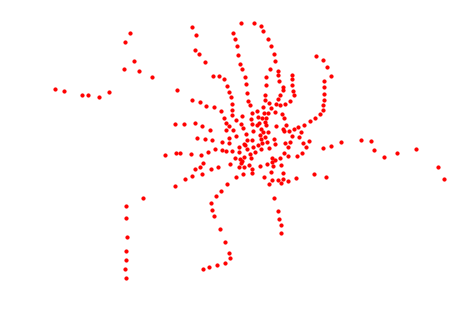

In [24]:
nx.draw(subway_graph, station_geo_new, with_labels=False, node_size=10)

In [25]:
station_connection = defaultdict(list)
for key in line_new.keys():
#     if key != '10号线' and key != '11号线' and key != '5号线':
    print(key)
    for i, sta in enumerate(line_new[key]):
        if i != 0 and i+2 <= len(line_new[key]):
            station_connection[line_new[key][i+1]].extend(line_new[key][i:i+3:2])
        elif i == 0:
            station_connection[line_new[key][i]].append(line_new[key][i+1])
            station_connection[line_new[key][i+1]].extend(line_new[key][i:i+3:2])
# 4号线环线
station_connection['上海体育馆'].append('上海体育场')
station_connection['上海体育场'].append('上海体育馆')

1号线
2号线
3号线
4号线
5号线
6号线
7号线
8号线
9号线
10号线
11号线
12号线
13号线
16号线
17号线
浦江线
5号线支线
10号线支线
11号线支线


In [26]:
station_connection

defaultdict(list,
            {'莘庄': ['外环路', '春申路'],
             '外环路': ['莘庄', '莲花路'],
             '莲花路': ['外环路', '锦江乐园'],
             '锦江乐园': ['莲花路', '上海南站'],
             '上海南站': ['锦江乐园', '漕宝路', '石龙路'],
             '漕宝路': ['上海南站', '上海体育馆', '桂林公园', '龙漕路'],
             '上海体育馆': ['漕宝路', '徐家汇', '宜山路', '上海体育场'],
             '徐家汇': ['上海体育馆', '衡山路', '宜山路', '肇嘉浜路', '交通大学', '上海游泳馆'],
             '衡山路': ['徐家汇', '常熟路'],
             '常熟路': ['衡山路', '陕西南路', '静安寺', '肇嘉浜路'],
             '陕西南路': ['常熟路', '黄陂南路', '上海图书馆', '新天地', '嘉善路', '南京西路'],
             '黄陂南路': ['陕西南路', '人民广场'],
             '人民广场': ['黄陂南路', '新闸路', '南京西路', '南京东路', '大世界', '曲阜路'],
             '新闸路': ['人民广场', '汉中路'],
             '汉中路': ['新闸路', '上海火车站', '南京西路', '曲阜路', '江宁路', '自然博物馆'],
             '上海火车站': ['汉中路', '中山北路', '中潭路', '宝山路', '中潭路', '宝山路'],
             '中山北路': ['上海火车站', '延长路'],
             '延长路': ['中山北路', '上海马戏城'],
             '上海马戏城': ['延长路', '汶水路'],
             '汶水路': ['上海马戏城', '彭浦新村'],
             '彭浦新村': [

经纬度信息不完整，不包含全部地铁站信息，因此若想绘制地铁站关联的图需要将不包含经纬度信息的地铁站关联去掉

In [27]:
w = defaultdict(list)
subway_road = defaultdict(list)
for i in station_geo_new.keys(): 
    w[i] = station_connection[i]
    
for i in w.keys():
    if set(w[i]).issubset(set(station_geo_new.keys())): 
        subway_road[i] = w[i]

In [28]:
subway_road

defaultdict(list,
            {'莘庄': ['外环路', '春申路'],
             '外环路': ['莘庄', '莲花路'],
             '莲花路': ['外环路', '锦江乐园'],
             '锦江乐园': ['莲花路', '上海南站'],
             '上海南站': ['锦江乐园', '漕宝路', '石龙路'],
             '上海体育馆': ['漕宝路', '徐家汇', '宜山路', '上海体育场'],
             '徐家汇': ['上海体育馆', '衡山路', '宜山路', '肇嘉浜路', '交通大学', '上海游泳馆'],
             '衡山路': ['徐家汇', '常熟路'],
             '常熟路': ['衡山路', '陕西南路', '静安寺', '肇嘉浜路'],
             '陕西南路': ['常熟路', '黄陂南路', '上海图书馆', '新天地', '嘉善路', '南京西路'],
             '黄陂南路': ['陕西南路', '人民广场'],
             '人民广场': ['黄陂南路', '新闸路', '南京西路', '南京东路', '大世界', '曲阜路'],
             '新闸路': ['人民广场', '汉中路'],
             '上海火车站': ['汉中路', '中山北路', '中潭路', '宝山路', '中潭路', '宝山路'],
             '中山北路': ['上海火车站', '延长路'],
             '延长路': ['中山北路', '上海马戏城'],
             '上海马戏城': ['延长路', '汶水路'],
             '汶水路': ['上海马戏城', '彭浦新村'],
             '彭浦新村': ['汶水路', '共康路'],
             '共康路': ['彭浦新村', '通河新村'],
             '通河新村': ['共康路', '呼兰路'],
             '呼兰路': ['通河新村', '共富新

In [29]:
su =  nx.Graph(subway_road)

/Users/zhangtingshuo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


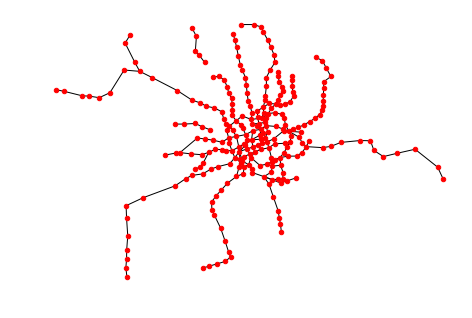

In [30]:
nx.draw(su, station_geo_new, with_labels=False, node_size=20)

建立search agent

In [31]:
def search(start, termination, station_connection, sort_candidate=None):
    pathes = [[start]]
    
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
            
        successors = station_connection[frontier]
            
        for stations in successors: 
            if stations in path: continue
            new_path = path + [stations]

            pathes.append(new_path)

            if stations == termination: return new_path

        visited.add(frontier)
        
        sort_candidate = sort_candidate or (lambda x : x)

        pathes = sort_candidate(pathes)

搜索函数（有待完善）

In [32]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [33]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [34]:
search('春申路','虹桥火车站',station_connection, sort_candidate=transfer_stations_first)

['春申路',
 '莘庄',
 '外环路',
 '莲花路',
 '锦江乐园',
 '上海南站',
 '漕宝路',
 '上海体育馆',
 '徐家汇',
 '交通大学',
 '江苏路',
 '中山公园',
 '娄山关路',
 '威宁路',
 '北新泾',
 '淞虹路',
 '虹桥2号航站楼',
 '虹桥火车站']

In [37]:
search('同济大学','交通大学',station_connection)

['同济大学',
 '四平路',
 '邮电新村',
 '海伦路',
 '宝山路',
 '上海火车站',
 '汉中路',
 '南京西路',
 '静安寺',
 '江苏路',
 '交通大学']

结果与百度地图搜索信息有部分出入，原因在于搜索函数目标不同，目前的搜索函数没将换乘信息以及乘坐时间进行考虑，只做了最简单的最少站数的搜索，因此结果存在不一致。之后会继续完善搜索函数，考虑换乘最少，以及距离最短，以及将二者综合考量，可以考虑使用weight method对根据需求赋予他们进行不同权重，再进行路线搜索。

### Part 2 Questions

#### 1. Why do we need machine learning methods instead of creating a complicated formula?

For some specific problems, it is said building a mathmatical formula seems to be a relatively easy and efficient way to sovle that. However, for most realistic problems, it's extremely difficult to create a formula directly or even after building a model or trying some tests. Machine learning, which is on the contrast, do not need to find the realstionship between variables, and makes it convinient and effective method to solve the problem.

#### 2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

The way of the 1st Random Chosen method sovling problem is totally random, which means only under enough samples the results of the approach could be persuasive. Then method then spend longer time compared to other more advanced methods.

#### 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

Yes, the 2nd one is better.
For some simple problems, it's definitely an effective method. But for those complicated problems, we cannot make sure the supervised direction is the best direction for the problem itself. In other words, even though we get the result in the end, it might not be the really result of the problem.

#### 4. Why do we use Derivative / Gredient to fit a target function?

Since the derivative/gradient represents the way that the function how to change.

#### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

#### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

The gradient descent method makes sure the direction, which is used to search the result of the problem, is the one that descends fastest. This property increases the effciency of the method without lots of samples.

#### 7. Using the simple words to describe: What's the machine leanring.

Generally speaking, machine learning is that we give instructions to computers, and computers would solve the problems automatically based on the instructions we give to them.

### Part 3 Re-code the house price machine learning

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
x,y = data['data'], data['target']

In [4]:
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [6]:
y[1]

21.6

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [13]:
def draw_rm_and_price():
    plt.scatter(x[:,5],y)

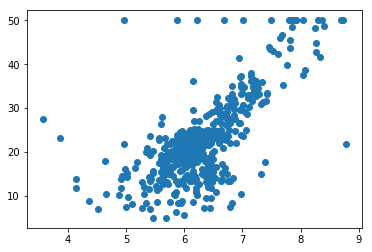

In [15]:
draw_rm_and_price()

In [20]:
import random

In [21]:
def price(rm, k, b):
    # f(x) = k*x + b
    return k * rm + b

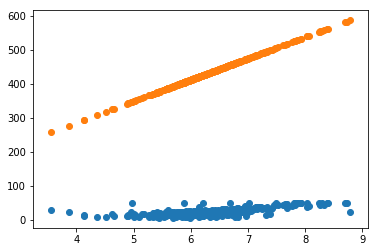

In [26]:
x_rm = x[:, 5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_b)

In [27]:
list(y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [28]:
price_by_random_k_b

[448.225,
 438.523,
 486.655,
 474.874,
 484.261,
 439.09,
 412.756,
 422.83599999999996,
 388.75300000000004,
 412.25199999999995,
 435.751,
 412.567,
 405.007,
 408.787,
 418.048,
 401.542,
 407.905,
 411.37,
 377.728,
 394.80100000000004,
 384.91,
 409.795,
 420.946,
 400.219,
 407.21200000000005,
 386.737,
 400.219,
 414.96099999999996,
 443.185,
 454.46200000000005,
 393.919,
 416.536,
 408.85,
 393.16299999999995,
 418.048,
 407.779,
 401.983,
 402.54999999999995,
 409.858,
 449.48499999999996,
 476.512,
 460.51,
 422.647,
 425.293,
 416.347,
 391.966,
 398.518,
 413.89000000000004,
 374.137,
 386.92600000000004,
 409.669,
 419.245,
 444.193,
 411.874,
 404.944,
 490.68699999999995,
 436.129,
 463.408,
 421.135,
 407.40099999999995,
 395.683,
 409.858,
 440.728,
 460.006,
 481.552,
 430.27,
 398.581,
 404.314,
 386.422,
 404.755,
 438.271,
 409.543,
 416.095,
 427.435,
 429.19899999999996,
 430.018,
 429.577,
 420.82,
 426.616,
 404.06199999999995,
 457.80100000000004,
 450.99699

#### LOSS

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 $$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))^2} $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum{(y_i - (kx_i + b))x_i} $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum{(y_i - \hat{y_i})x_i} $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum{(y_i - \hat{y_i})} $$

In [29]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in  zip(list(y), list(y_hat))) / len(list(y))

In [33]:
a = [1,2,3]
# b = ['a', 'b', 'c']
b = [4,5,6]

In [50]:
list(zip(a,b))

[(1, 4), (2, 5), (3, 6)]

In [72]:
random.random()*100

4.416425414213842

### 1st-method: Random Generation: get k_best and b_best 

In [88]:
trying_times = 2000

min_loss = float('inf')
k_best, b_best = None, None

for i in range(trying_times):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    price_by_random_k_b = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_k_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        k_best, b_best = k, b
        
        print('When time is {}, get best k: {}, best b: {},and the loss is {}'.format(i, k_best, b_best, min_loss))
    

When time is 0, get best k: -72.12291798910763, best b: 44.11182801778389,and the loss is 189647.95416037866
When time is 4, get best k: -58.19451184516207, best b: 66.17983434600248,and the loss is 106013.1693323164
When time is 5, get best k: 25.062739562609295, best b: 89.48420000648102,and the loss is 50552.097373166755
When time is 8, get best k: -8.71777198858669, best b: 61.71388244881845,and the loss is 443.63138314263057
When time is 19, get best k: 7.682938182219019, best b: -33.919625297303924,and the loss is 111.30866379606462
When time is 201, get best k: 2.6256988581304626, best b: 8.221452125842177,and the loss is 69.06309455358326
When time is 314, get best k: 13.261657043268627, best b: -59.690025478260566,and the loss is 53.38359732354733
When time is 740, get best k: 11.967520657968493, best b: -54.153869278649715,and the loss is 49.82203434736326
When time is 1717, get best k: 8.375172842045203, best b: -29.486368772435625,and the loss is 44.24002595918092


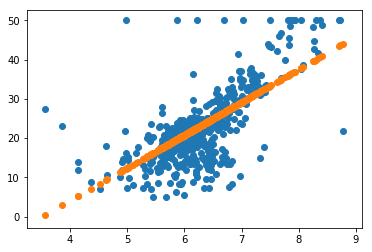

In [89]:
k = 8.375
b = -29.486

y_test = [price(t,k,b) for t in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, y_test)

### 2nd-method: Direction Adjusting

In [143]:
try_times = 5000

min_loss_da = float('inf')

k_best_da = random.random()*200 - 100
b_best_da = random.random()*200 - 100

# for each tuple in direction, left side represents the change of k, and the other side represents b
direction = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1),
]

next_direction = random.choice(direction)
scalar = 0.15

update_time = 0

for i in range(try_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = k_best_da + k_direction * scalar, b_best_da + b_direction * scalar
    
    price_by_k_b_da = [price(t, current_k, current_b) for t in x_rm]
    
    current_loss = loss(y, price_by_k_b_da)
    if  current_loss < min_loss_da:
        min_loss_da = current_loss
        k_best_da, b_best_da = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time %10 == 0:
            print('When time is {}, get best k: {}, best b: {},and the loss is {}'.format(i, k_best_da, b_best, min_loss_da))
    else:
        next_direction = random.choice(direction)

When time is 9, get best k: 40.611880435572075, best b: -29.486368772435625,and the loss is 32171.005887320724
When time is 19, get best k: 39.11188043557209, best b: -29.486368772435625,and the loss is 29368.42135697984
When time is 29, get best k: 37.611880435572104, best b: -29.486368772435625,and the loss is 26693.727077847394
When time is 39, get best k: 36.11188043557212, best b: -29.486368772435625,and the loss is 24146.923049923502
When time is 49, get best k: 34.61188043557213, best b: -29.486368772435625,and the loss is 21728.009273208096
When time is 59, get best k: 33.11188043557215, best b: -29.486368772435625,and the loss is 19436.985747701143
When time is 69, get best k: 31.61188043557216, best b: -29.486368772435625,and the loss is 17273.85247340271
When time is 79, get best k: 30.111880435572175, best b: -29.486368772435625,and the loss is 15238.60945031277
When time is 89, get best k: 28.61188043557219, best b: -29.486368772435625,and the loss is 13331.25667843132
Whe

### 3rd-method: Gradient Descent  

#### 导数

In [144]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient_k = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient_k += (y_i - y_hat_i) * x_i
        
    return -2 / n * gradient_k


def partial_b(x, y, y_hat):
    n = len(y)
    
    gradient_b = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient_b += (y_i - y_hat_i)
        
    return -2 / n * gradient_b
        

In [145]:
try_times = 2000

min_loss_gd = float('inf')

k_best_gd = random.random()*200-100 
b_best_gd = random.random()*200-100

learning_rate = 1e-04

update_time = 0

for i in range(try_times):
    
    price_by_k_b_gd = [price(t, k_best_gd, b_best_gd) for t in x_rm]
    
    current_loss = loss(y, price_by_k_b_gd)
    
    if current_loss < min_loss_gd:
        min_loss_gd = current_loss
        update_time += 1
        if update_time % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, k_best_gd, b_best_gd, min_loss_gd))
    
    k_gradient = partial_k(x_rm, y, price_by_k_b_gd)
    
    b_gradient = partial_b(x_rm, y, price_by_k_b_gd)
    
    k_best_gd = k_best_gd + (-1) * k_gradient * learning_rate
    
    b_best_gd = b_best_gd + (-1) * b_gradient * learning_rate

When time is : 49, get best_k: -30.367918467610714 best_b: -57.49804716087022, and the loss is: 74188.28402428734
When time is : 99, get best_k: -16.194034055515555 best_b: -55.26784216220934, and the loss is: 32605.77840437726
When time is : 149, get best_k: -6.801371939360398 best_b: -53.789269788050746, and the loss is: 14344.97623327456
When time is : 199, get best_k: -0.5771355244341372 best_b: -52.80879023730278, and the loss is: 6325.812857986546
When time is : 249, get best_k: 3.547445032053423 best_b: -52.1583874723211, and the loss is: 2804.2268340079027
When time is : 299, get best_k: 6.280623319304327 best_b: -51.72672043823024, and the loss is: 1257.7350732521206
When time is : 349, get best_k: 8.09174561425643 best_b: -51.440005520827825, and the loss is: 578.5985671524866
When time is : 399, get best_k: 9.291838830198323 best_b: -51.249347712506825, and the loss is: 280.35787544721063
When time is : 449, get best_k: 10.0870146282701 best_b: -51.12234521518557, and the lo

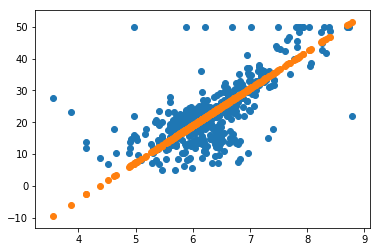

In [146]:
k = 11.640
b = -50.816

y_test = [price(t,k,b) for t in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, y_test)